# DSCI 100 Group Project -- Aadi Kanwar

## Introduction

Our group has decided to analyze a dataset containing various categorical and numerical facts about individuals (education, income, and credit score being pertinent to this project), classifying the credit score categorically as either "Low" "Average" or "High". An individual's credit score describes their "creditworthiness", i.e their ability and trustworthiness to repay their debts. Therefore one can reason that a high credit score demonstrates a high "creditworthiness". Credit scores can be numerically represented, (and often are), but for the simplicity of this project, we have decided to classify credit scores between three categorical variables, (low, average, and high). If one wishes to consider these categories numerically, we consider a low credit score to be approximately 300, a high credit score to be around 800, and an average credit score to be around 550 (Investopedia, 2023). Given this information, we formulate the question: "What is a credit score of an individual classified as, when considering their income and education?". The specific data set that will be used to answer this question is titled "Credit Score Classification Dataset" and is provided by Sujith K. Mandala on Kaggle ([here is a direct link](https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset/data)). 

## Preliminary Exploratory Data Analysis 

### Reading the dataset into R from the web

In [3]:
install.packages("janitor")

also installing the dependency ‘snakecase’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(tidyverse)
library(janitor)

url1 <- "https://raw.githubusercontent.com/aadikanwar/DSCI100_group_project/main/Credit%20Score%20Classification%20Dataset.csv"  # URL for the raw dataset, taken from the uploaded data set from our GitHub repo
download.file(url1, "data/credit_score_data.csv")  # downloading the file as a data file into the working directory 
data <- read_csv("data/credit_score_data.csv")  #reading the file into the notebook, 
head(data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ stringr 1.5.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ readr::spec()       masks yardstick::spec()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 164 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Education, Marital Status, Home Ownership, Credit Score
dbl (3): Age, Income, Number of Children

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
25,Female,50000,Bachelor's Degree,Single,0,Rented,High
30,Male,100000,Master's Degree,Married,2,Owned,High
35,Female,75000,Doctorate,Married,1,Owned,High
40,Male,125000,High School Diploma,Single,0,Owned,High
45,Female,100000,Bachelor's Degree,Married,3,Owned,High
50,Male,150000,Master's Degree,Married,0,Owned,High


### Cleaning and Wrangling the Data 

In [5]:
clean_cs_data <- data |>
    clean_names()  # this is done to clean the column names and follow the proper tidy convention of column names being lowercase and seperated via underscores 

clean_cs_data <- clean_cs_data |>
    mutate(credit_score = as_factor(credit_score))  #converting the variable we wish to predict into a factor, which will prove to be helpful for analysis

clean_cs_data <- clean_cs_data |>
    select(income, education, credit_score)

head(clean_cs_data) 

income,education,credit_score
<dbl>,<chr>,<fct>
50000,Bachelor's Degree,High
100000,Master's Degree,High
75000,Doctorate,High
125000,High School Diploma,High
100000,Bachelor's Degree,High
150000,Master's Degree,High


The data presented is sensibly clean and wrangled appropriately. Each row is a singular observation, each column is a singular variable, and each cell contains a singular value, and so this data can be considered tidy. The names were cleaned to contain no spaces and be lowercase, and the credit_score column was wrangled such that it is represented as a factor, as that is what we wish to predict/classify. Only pertinent columns are selected (predictors: income and education, and the factor credit_score). 

### Creating a Summary Table using Training Data

In [27]:
library(tidymodels)
cs_split <- initial_split(clean_cs_data, prop = 0.75, strata = credit_score)  #splitting the data into training and testing data
cs_training <- training(cs_split)
cs_testing <- testing(cs_split)

summary_table_1 <- cs_training |>  #displaying the count of each pre-existing class in the training data 
    count(credit_score)

summary_table_1

summary_table_2 <- cs_training |>  #displaying the count of the education predictor variables, also showing the types of educations 
    count(education)

summary_table_2

summary_table_3 <- cs_training |>  #displaying the count of the income predictor variables, showing the different income types and values  
    count(income)

summary_table_3

count_of_NA <- sum(is.na(cs_training))

summary_table_4 <- tibble(count_of_NA)

summary_table_4

total_summary <- (summary(cs_training[c("income", "credit_score")]))

total_summary 


credit_score,n
<fct>,<int>
High,83
Average,24
Low,15


education,n
<chr>,<int>
Associate's Degree,21
Bachelor's Degree,33
Doctorate,23
High School Diploma,21
Master's Degree,24


income,n
<dbl>,<int>
25000,1
27500,4
30000,1
32500,4
35000,1
37500,4
40000,1
45000,3
47500,3


count_of_NA
<int>
0


     income        credit_score
 Min.   : 25000   High   :83   
 1st Qu.: 58125   Average:24   
 Median : 82250   Low    :15   
 Mean   : 83008                
 3rd Qu.:105000                
 Max.   :160000                

### Creating Important Plots Comparing Distributions of Predictors and Varying Income, via the Training Data

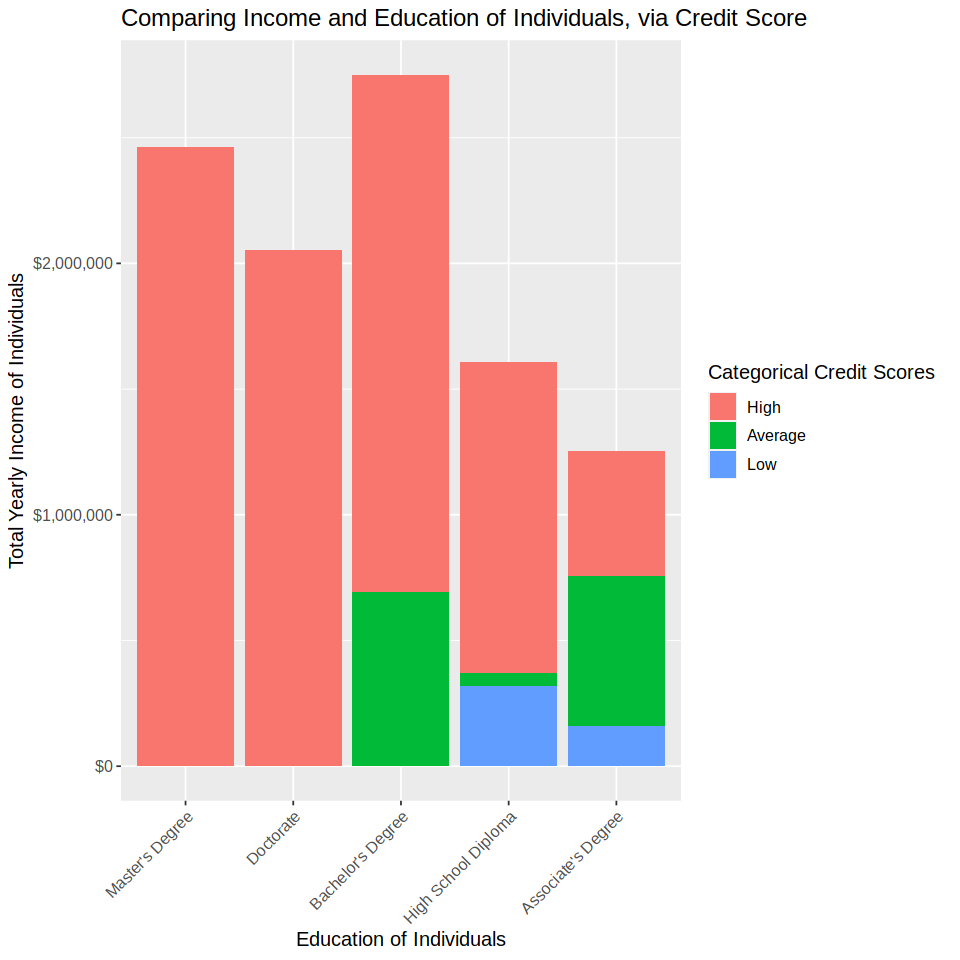

In [81]:
library(repr)
options(repr.plot.width = 8, repr.plot.height = 8)

credit_plot <- cs_training |>
    ggplot(aes(x = fct_reorder(education, income, .desc = TRUE), y = income, fill = credit_score)) +
    geom_bar(stat = 'identity') +
    labs(x = "Education of Individuals", y = "Total Yearly Income of Individuals", fill = "Categorical Credit Scores") +
    ggtitle("Comparing Income and Education of Individuals, via Credit Score") +
    scale_y_continuous(labels = dollar_format())+
    theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 12))

credit_plot 

# plot_2 <- cs_training |>
#     ggplot(aes(x = credit_score)) +
#     geom_histogram(stat = "count")

# plot_2